In [ ]:
import pandas as pd
patient = pd.read_csv('training_set.csv') # csv 파일 읽기

In [ ]:
print(patient) # 데이터 출력

      HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  ...   MCV  AGE  SEX  SOURCE
0            33.8          11.1         4.18        4.6  ...  80.9   33    F       1
1            44.6          14.0         6.86        6.3  ...  65.0   36    M       0
2            42.9          14.0         4.57        6.2  ...  93.9   70    F       0
3            41.9          14.4         4.67        3.5  ...  89.7   18    F       0
4            40.6          13.3         4.85       14.9  ...  83.7   36    M       0
...           ...           ...          ...        ...  ...   ...  ...  ...     ...
3304         39.0          13.2         4.45        4.0  ...  87.6   45    M       1
3305         25.4           8.2         3.27        5.4  ...  77.7    1    F       1
3306         38.2          12.4         4.40        8.4  ...  86.8   64    M       0
3307         43.4          15.2         5.29       10.1  ...  82.0   33    M       0
3308         32.4          10.7         3.66        9.4  ...  88.

In [ ]:
patient.head() # 데이터 헤드 출력

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


In [ ]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   object 
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 284.5+ KB


In [ ]:
SEX = {"M" : 1, "F" : 0}
patient["SEX"] = patient["SEX"].map(SEX)

In [ ]:
patient.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
count,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000
mean,38.226111,12.749350,4.544802,8.715533,258.893019,28.230039,33.336476,84.611333,46.644303,0.526745,0.398005
std,5.971943,2.084325,0.784510,4.991299,112.676139,2.696520,1.247055,6.916079,21.874106,0.499360,0.489561
min,13.700000,3.800000,1.480000,1.100000,10.000000,14.900000,26.000000,54.000000,1.000000,0.000000,0.000000
25%,34.300000,11.400000,4.040000,5.700000,191.000000,27.200000,32.700000,81.500000,29.000000,0.000000,0.000000
50%,38.700000,12.900000,4.580000,7.600000,257.000000,28.700000,33.400000,85.300000,48.000000,1.000000,0.000000
75%,42.500000,14.200000,5.060000,10.300000,322.000000,29.800000,34.100000,88.800000,64.000000,1.000000,1.000000
max,69.000000,18.900000,7.860000,76.600000,1121.000000,40.800000,38.400000,115.600000,99.000000,1.000000,1.000000


In [ ]:
data = patient[['HAEMATOCRIT','HAEMOGLOBINS','ERYTHROCYTE','LEUCOCYTE','THROMBOCYTE','MCH','MCHC','MCV','AGE','SEX']].to_numpy() # 데이터 numpy 배열로 저장
target = patient['SOURCE'].to_numpy() # 타겟 numpy 배열로 저장

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42, stratify=target) # 훈련 데이터와 테스트 데이터를 나눈다.

In [ ]:
print(train_input.shape, test_input.shape) # 훈련 세트와 테스트 세트 크기 확인

(2647, 10) (662, 10)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input) # 훈련 세트 전처리
test_scaled = ss.transform(test_input) # 테스트 세트 전처리

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target) # 로지스틱 회귀 훈련
print("Train score:",lr.score(train_scaled, train_target)) # 훈련 세트 점수 결과
print("Test score:",lr.score(test_scaled, test_target)) # 테스트 세트 점수 결과

Train score: 0.7223271628258405
Test score: 0.7069486404833837


설명 가능한 트리

In [ ]:
from sklearn.tree import DecisionTreeClassifier # 결정 트리
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target) # 결정 트리 훈련
print(dt.score(train_scaled, train_target)) # 훈련 세트 점수 결과
print(dt.score(test_scaled, test_target)) # 테스트 세트 점수 결과

1.0
0.676737160120846


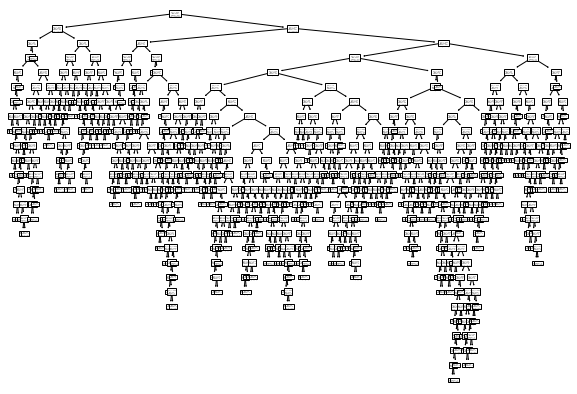

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

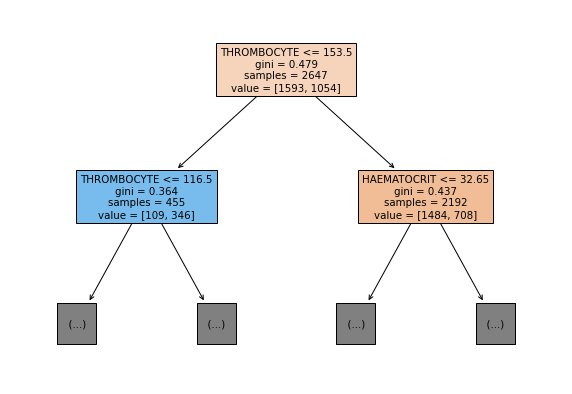

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['HAEMATOCRIT','HAEMOGLOBINS','ERYTHROCYTE','LEUCOCYTE','THROMBOCYTE','MCH','MCHC','MCV','AGE'])
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_depth4 = DecisionTreeClassifier(max_depth=3, random_state=42) # 깊이를 3으로 설정
dt_depth4.fit(train_scaled, train_target) # 결정 트리 훈련
print(dt_depth4.score(train_scaled, train_target)) # 훈련 세트 점수 결과
print(dt_depth4.score(test_scaled, test_target)) # 테스트 세트 점수 결과

0.74159425765017
0.7175226586102719


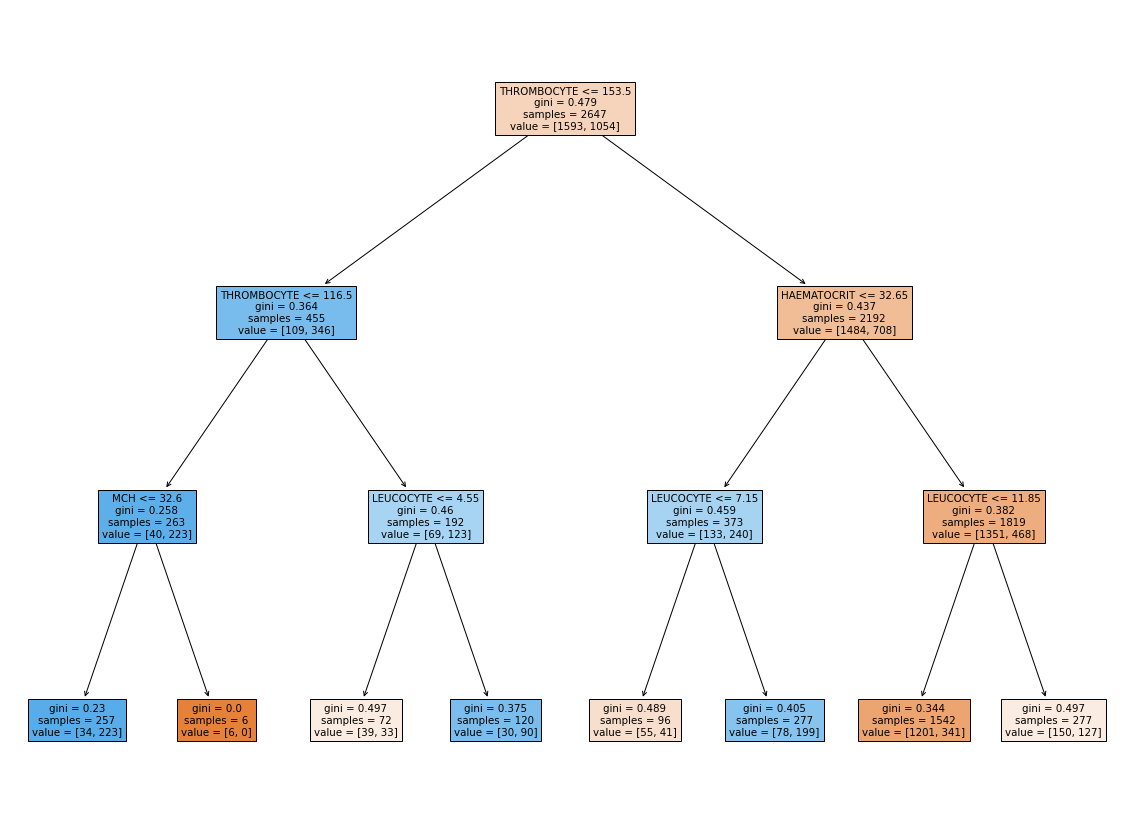

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt_depth4, filled=True, feature_names=['HAEMATOCRIT','HAEMOGLOBINS','ERYTHROCYTE','LEUCOCYTE','THROMBOCYTE','MCH','MCHC','MCV','AGE'])
plt.show()

랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf.fit(train_input, train_target) # 랜덤 포레스트 훈련
print(rf.score(train_input, train_target)) # 훈련 세트 점수 결과
print(rf.score(test_input, test_target)) # 테스트 세트 점수 결과

0.9996222138269739
0.7507552870090635
